## EDUNET FOUNDATION - Self-Practice Exercise Notebook Solution

### LAB 20 - Implementing Random forest Concepts in Python

Problem 1:

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
import warnings

In [3]:
data=pd.read_csv("train.csv")
df=pd.DataFrame(data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.describe(include="all")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
print(df.isnull().values.any())
print(df.isnull().sum().sum())

False
0


In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

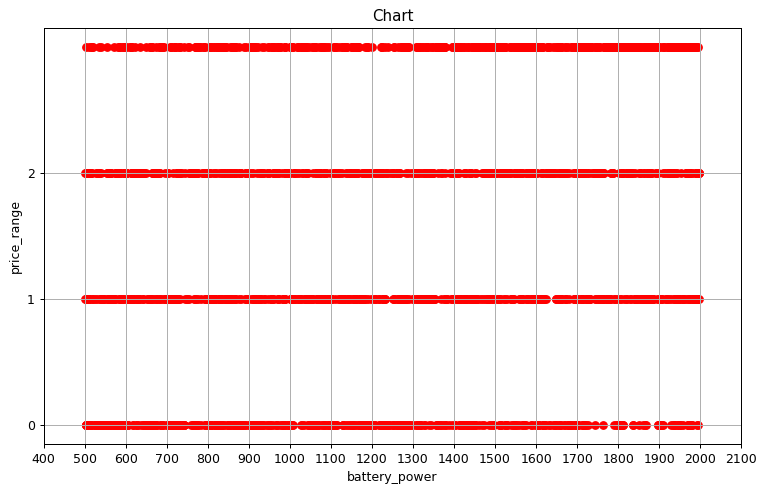

In [7]:
plt.figure(figsize=(10,6),dpi=90)
plt.scatter(df['battery_power'],df['price_range'],color='red')
plt.title("Chart")
plt.xlabel('battery_power')
plt.ylabel('price_range')
plt.xticks(np.arange(400,2200,100))
plt.yticks(np.arange(0,3,1))
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.grid()
plt.show()

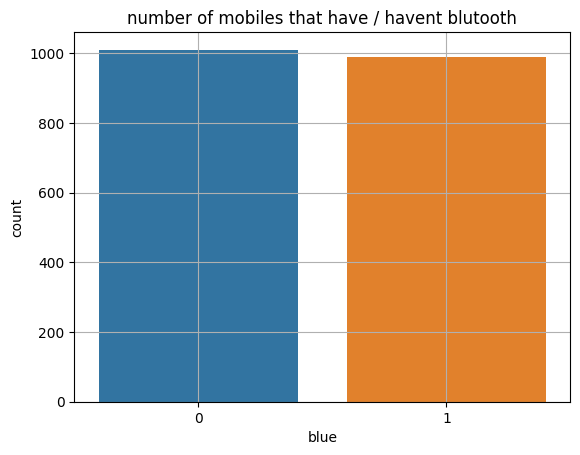

In [8]:
sns.countplot(x=df['blue'])
plt.title('number of mobiles that have / havent blutooth')
plt.grid()

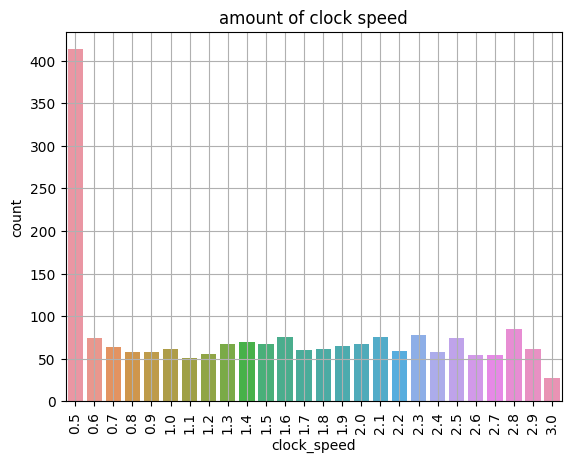

In [9]:
sns.countplot(x=df['clock_speed'])
plt.xticks(rotation=90)
plt.title('amount of clock speed')
plt.grid()

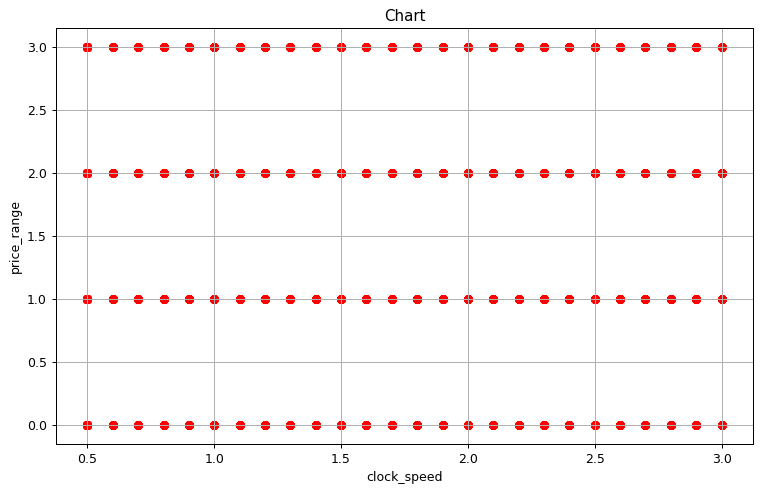

In [10]:
plt.figure(figsize=(10,6),dpi=90)
plt.scatter(df['clock_speed'],df['price_range'],color='red')
plt.title("Chart")
plt.xlabel('clock_speed')
plt.ylabel('price_range')
#plt.xticks(np.arange(400,2200,100))
#plt.yticks(np.arange(0,3,1))
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.grid()
plt.show()

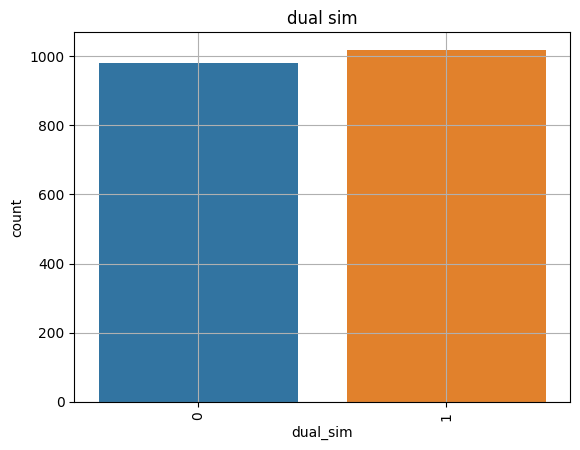

In [11]:
sns.countplot(x=df['dual_sim'])
plt.xticks(rotation=90)
plt.title('dual sim')
plt.grid()

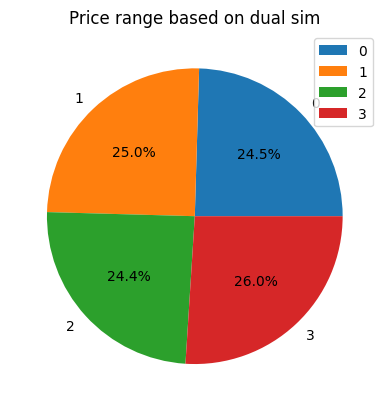

In [12]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a column named 'category' containing the categories and another column named 'value' containing the corresponding values

# Group the dataframe by category and calculate the sum of values
grouped_df = df.groupby('price_range')['dual_sim'].sum()

# Get the labels and sizes for the pie chart
labels = grouped_df.index
sizes = grouped_df.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Price range based on dual sim')
plt.legend()
# Display the chart
plt.show()

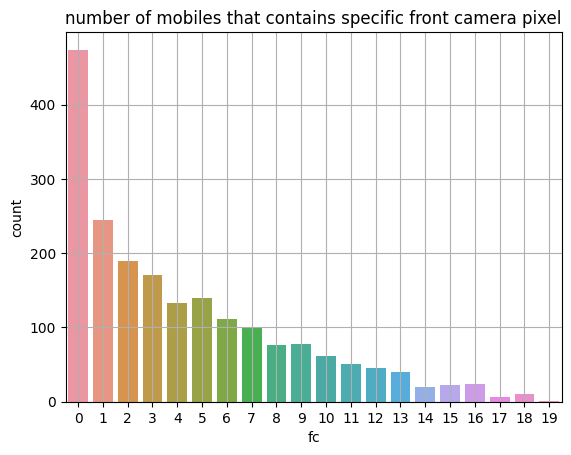

In [13]:
sns.countplot(x=df['fc'])
plt.title('number of mobiles that contains specific front camera pixel')
plt.grid()

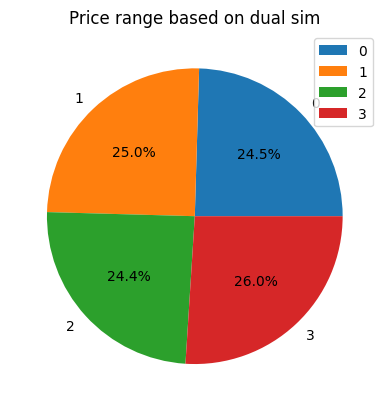

In [14]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a column named 'category' containing the categories and another column named 'value' containing the corresponding values

# Group the dataframe by category and calculate the sum of values
grouped_df = df.groupby('price_range')['dual_sim'].sum()

# Get the labels and sizes for the pie chart
labels = grouped_df.index
sizes = grouped_df.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Price range based on dual sim')
plt.legend()
# Display the chart
plt.show()

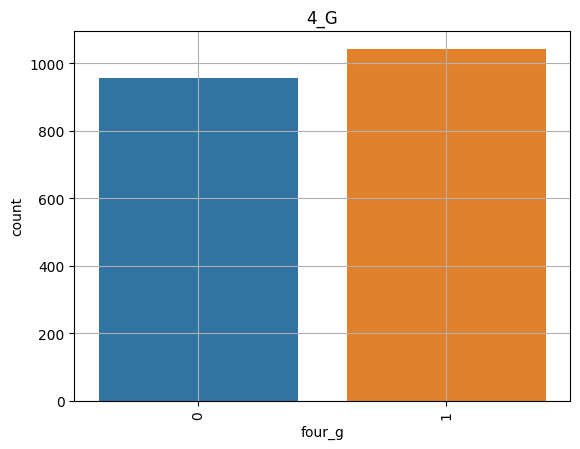

In [15]:
sns.countplot(x=df['four_g'])
plt.xticks(rotation=90)
plt.title('4_G')
plt.grid()

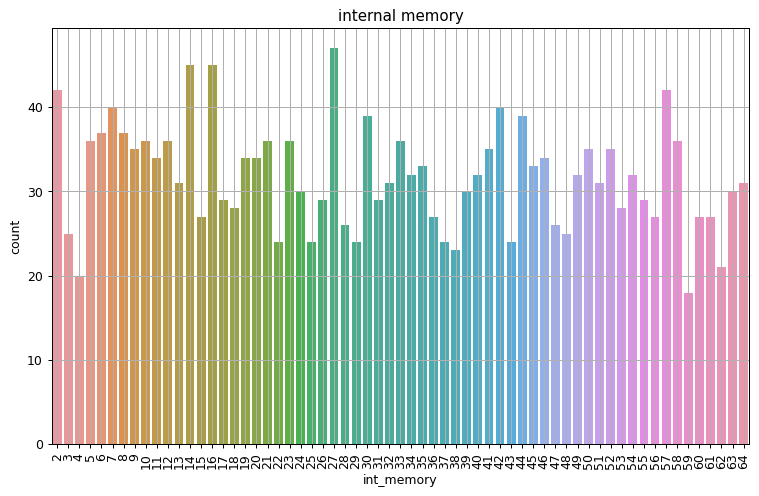

In [16]:
plt.figure(figsize=(10,6),dpi=90)
sns.countplot(x=df['int_memory'])
plt.xticks(rotation=90)
plt.title('internal memory')
plt.grid()

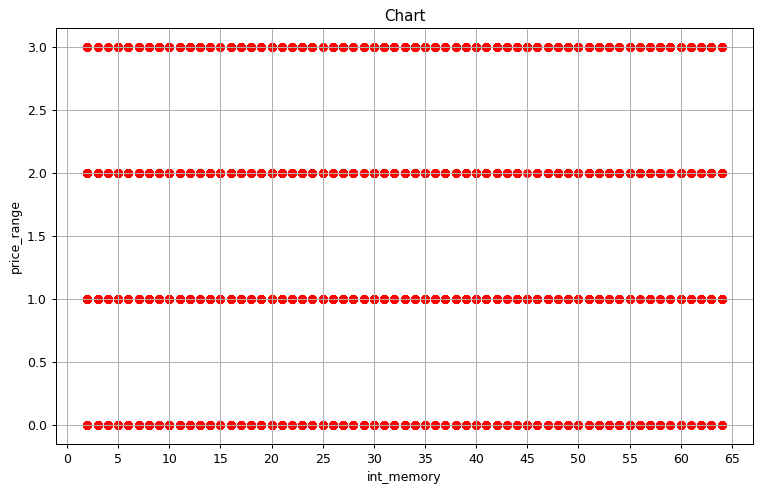

In [17]:
plt.figure(figsize=(10,6),dpi=90)
plt.scatter(df['int_memory'],df['price_range'],color='red')
plt.title("Chart")
plt.xlabel('int_memory')
plt.ylabel('price_range')
plt.xticks(np.arange(0,68,5))
#plt.yticks(np.arange(0,3,1))
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.grid()
plt.show()

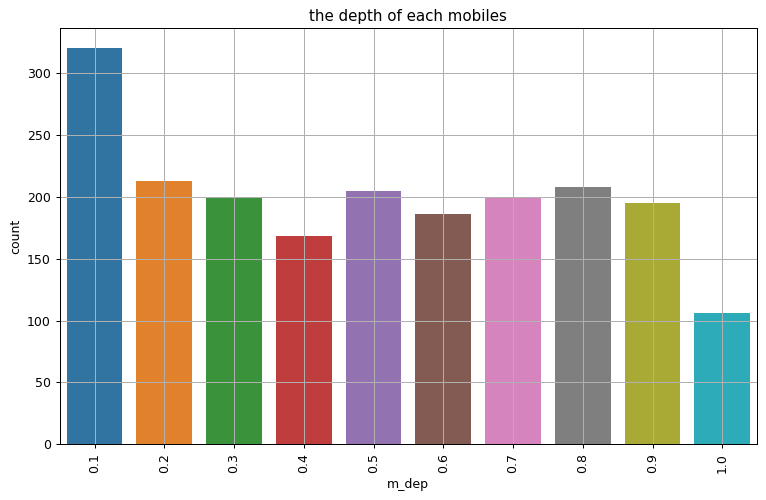

In [18]:
plt.figure(figsize=(10,6),dpi=90)
sns.countplot(x=df['m_dep'])
plt.xticks(rotation=90)
plt.title('the depth of each mobiles')
plt.grid()

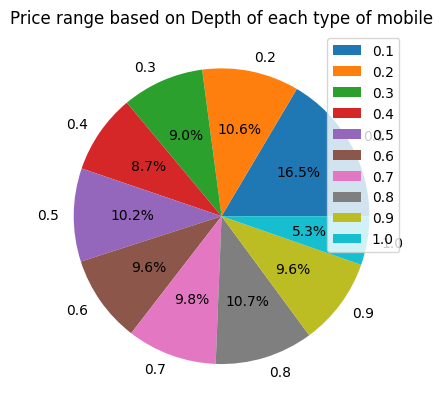

In [19]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a column named 'category' containing the categories and another column named 'value' containing the corresponding values

# Group the dataframe by category and calculate the sum of values
grouped_df = df.groupby('m_dep')['price_range'].sum()

# Get the labels and sizes for the pie chart
labels = grouped_df.index
sizes = grouped_df.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Price range based on Depth of each type of mobile')
plt.legend()
# Display the chart
plt.show()

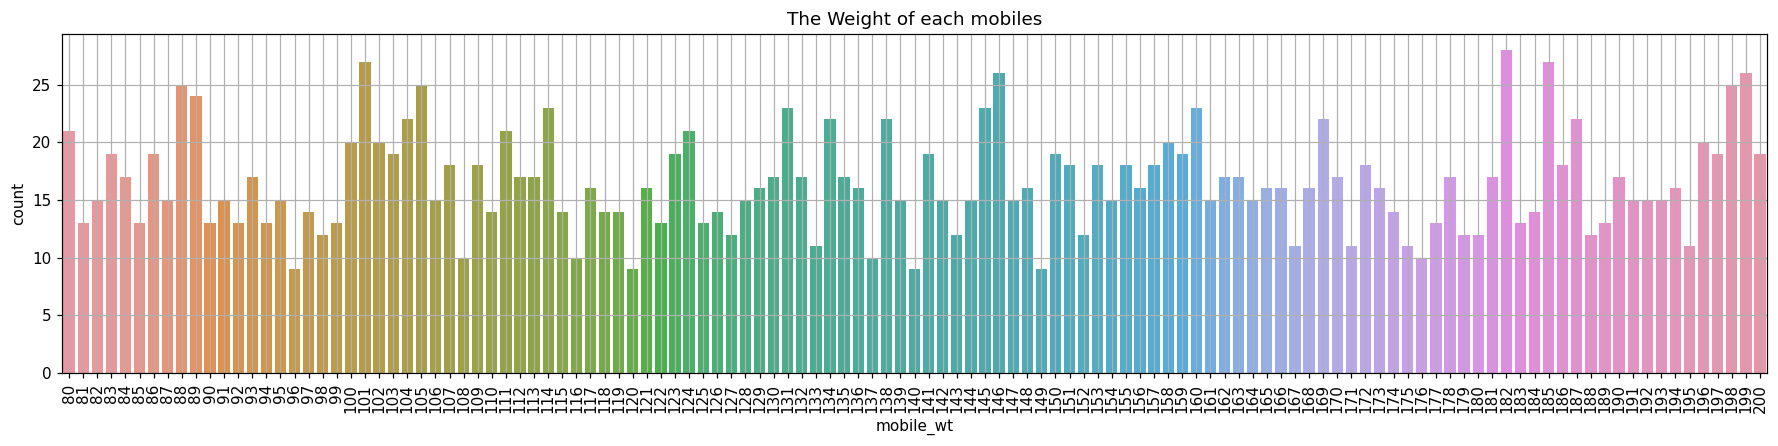

In [20]:
plt.figure(figsize=(20,4),dpi=110)
sns.countplot(x=df['mobile_wt'])
plt.xticks(rotation=90)
plt.title('The Weight of each mobiles')
plt.grid()

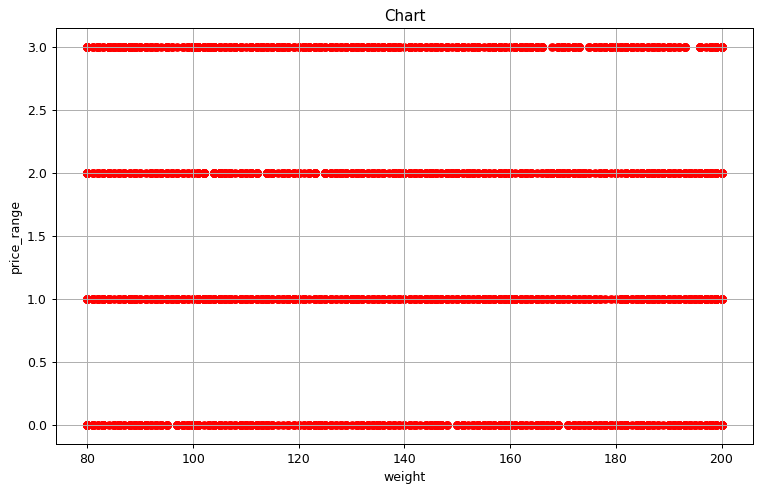

In [21]:
plt.figure(figsize=(10,6),dpi=90)
plt.scatter(df['mobile_wt'],df['price_range'],color='red')
plt.title("Chart")
plt.xlabel('weight')
plt.ylabel('price_range')
#plt.xticks(np.arange(0,68,5))
#plt.yticks(np.arange(0,3,1))
#plt.xticks(rotation=90)
#plt.yticks(rotation=90)
plt.grid()
plt.show()

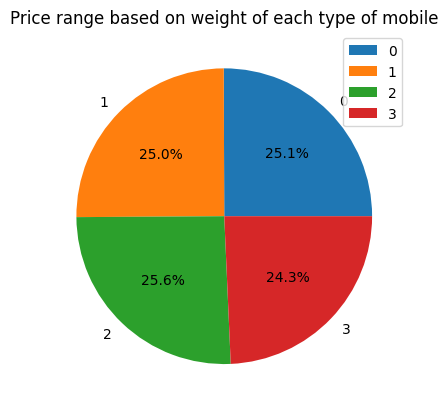

In [22]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a column named 'category' containing the categories and another column named 'value' containing the corresponding values

# Group the dataframe by category and calculate the sum of values
grouped_df = df.groupby('price_range')['mobile_wt'].sum()

# Get the labels and sizes for the pie chart
labels = grouped_df.index
sizes = grouped_df.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Price range based on weight of each type of mobile')
plt.legend()
# Display the chart
plt.show()


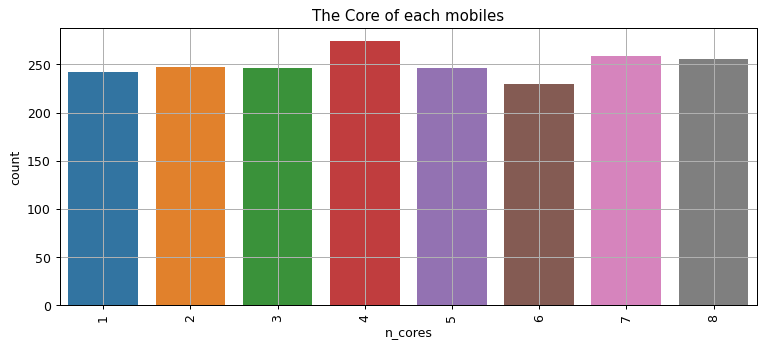

In [23]:
plt.figure(figsize=(10,4),dpi=90)
sns.countplot(x=df['n_cores'])
plt.xticks(rotation=90)
plt.title('The Core of each mobiles')
plt.grid()

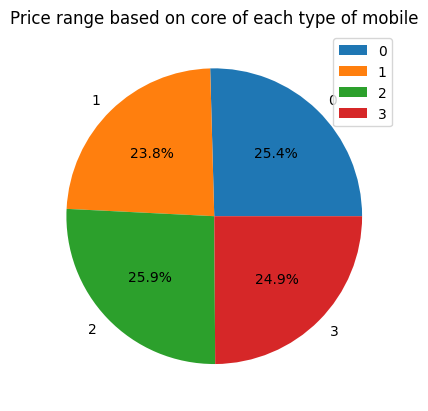

In [24]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a column named 'category' containing the categories and another column named 'value' containing the corresponding values

# Group the dataframe by category and calculate the sum of values
grouped_df = df.groupby('price_range')['n_cores'].sum()

# Get the labels and sizes for the pie chart
labels = grouped_df.index
sizes = grouped_df.values

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Price range based on core of each type of mobile')
plt.legend()
# Display the chart
plt.show()


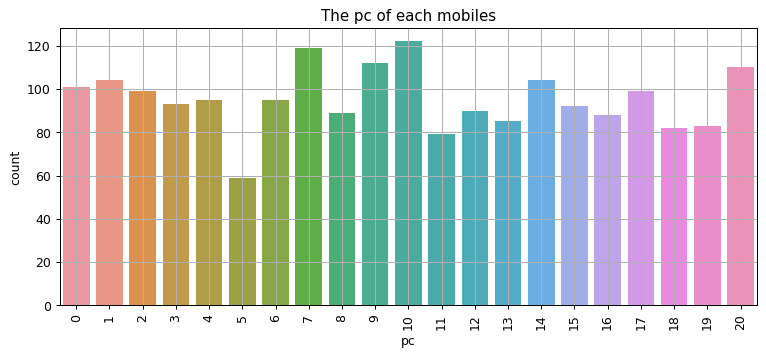

In [25]:
plt.figure(figsize=(10,4),dpi=90)
sns.countplot(x=df['pc'])
plt.xticks(rotation=90)
plt.title('The pc of each mobiles')
plt.grid()

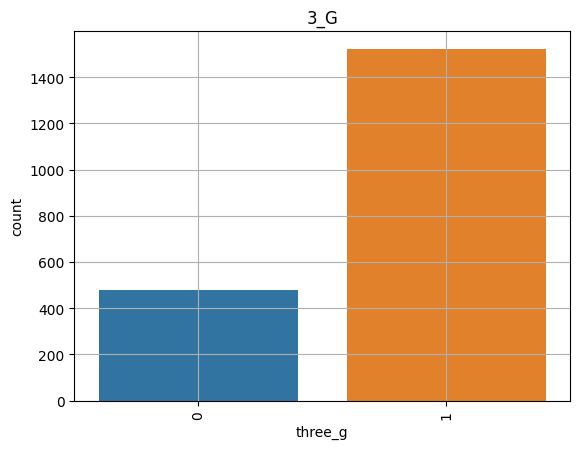

In [26]:
sns.countplot(x=df['three_g'])
plt.xticks(rotation=90)
plt.title('3_G')
plt.grid()

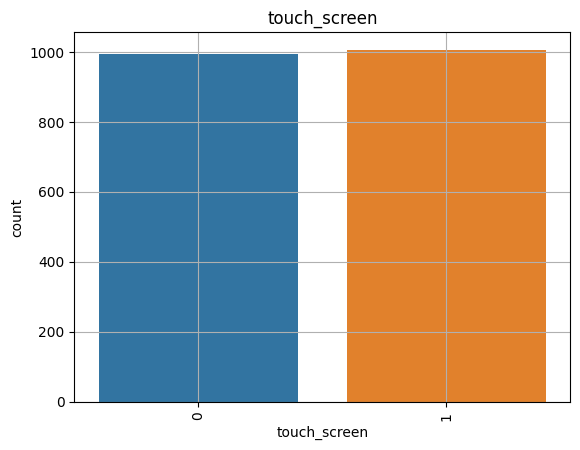

In [27]:
sns.countplot(x=df['touch_screen'])
plt.xticks(rotation=90)
plt.title('touch_screen')
plt.grid()

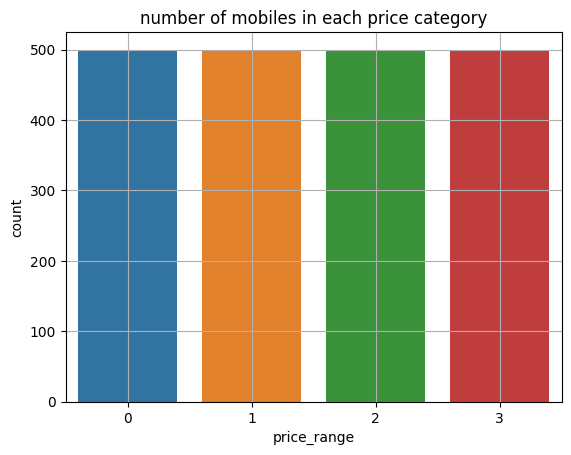

In [28]:
sns.countplot(x=df['price_range'])
plt.title('number of mobiles in each price category')
plt.grid()

In [45]:
df.reset_index(inplace=True)
df

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794,1,0.5,1,0,1,2,0.8,106,...,1222,1890,668,13,4,19,1,1,0,0
1996,1996,1965,1,2.6,1,0,0,39,0.2,187,...,915,1965,2032,11,10,16,1,1,1,2
1997,1997,1911,0,0.9,1,1,1,36,0.7,108,...,868,1632,3057,9,1,5,1,1,0,3
1998,1998,1512,0,0.9,0,4,1,46,0.1,145,...,336,670,869,18,10,19,1,1,1,0


In [36]:
df1=pd.DataFrame(df,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [46]:
df.drop(columns=["index"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [47]:
df1=pd.DataFrame(df,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
df1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [48]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
norm1=scaler.fit_transform(df1)
df2=pd.DataFrame(norm1,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [49]:
extracted_col = df["price_range"]
df2.insert(20, "price_range", extracted_col)
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,2
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,3
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0


In [50]:
df.columns

Index(['index', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [51]:
x =pd.DataFrame(df2,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
y= df2['price_range'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [52]:
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.3 , random_state = 1)
clf = DecisionTreeClassifier (max_depth =6)
clf = clf.fit (x_train , y_train)
y_pred = clf.predict (x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8666666666666667


In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model_new= DecisionTreeClassifier (max_depth =7)


kfold_validation=KFold(9)

results= cross_val_score(model_new, x , y , cv=kfold_validation)

print(results)
print(np.mean(results))

[0.83408072 0.87443946 0.83333333 0.83333333 0.81981982 0.87387387
 0.85135135 0.84234234 0.81531532]
0.8419877276379518


In [54]:
from sklearn import tree
text_representation = tree.export_text (clf)
print (text_representation)

|--- feature_13 <= 0.53
|   |--- feature_13 <= 0.22
|   |   |--- feature_11 <= 0.74
|   |   |   |--- feature_0 <= 0.87
|   |   |   |   |--- feature_6 <= 0.99
|   |   |   |   |   |--- feature_11 <= 0.64
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_11 >  0.64
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.99
|   |   |   |   |   |--- feature_0 <= 0.78
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  0.78
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.87
|   |   |   |   |--- feature_12 <= 0.69
|   |   |   |   |   |--- feature_13 <= 0.14
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_13 >  0.14
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_12 >  0.69
|   |   |   |   |   |--- feature_8 <= 0.98
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  0.98
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_11 >  0.74
|   

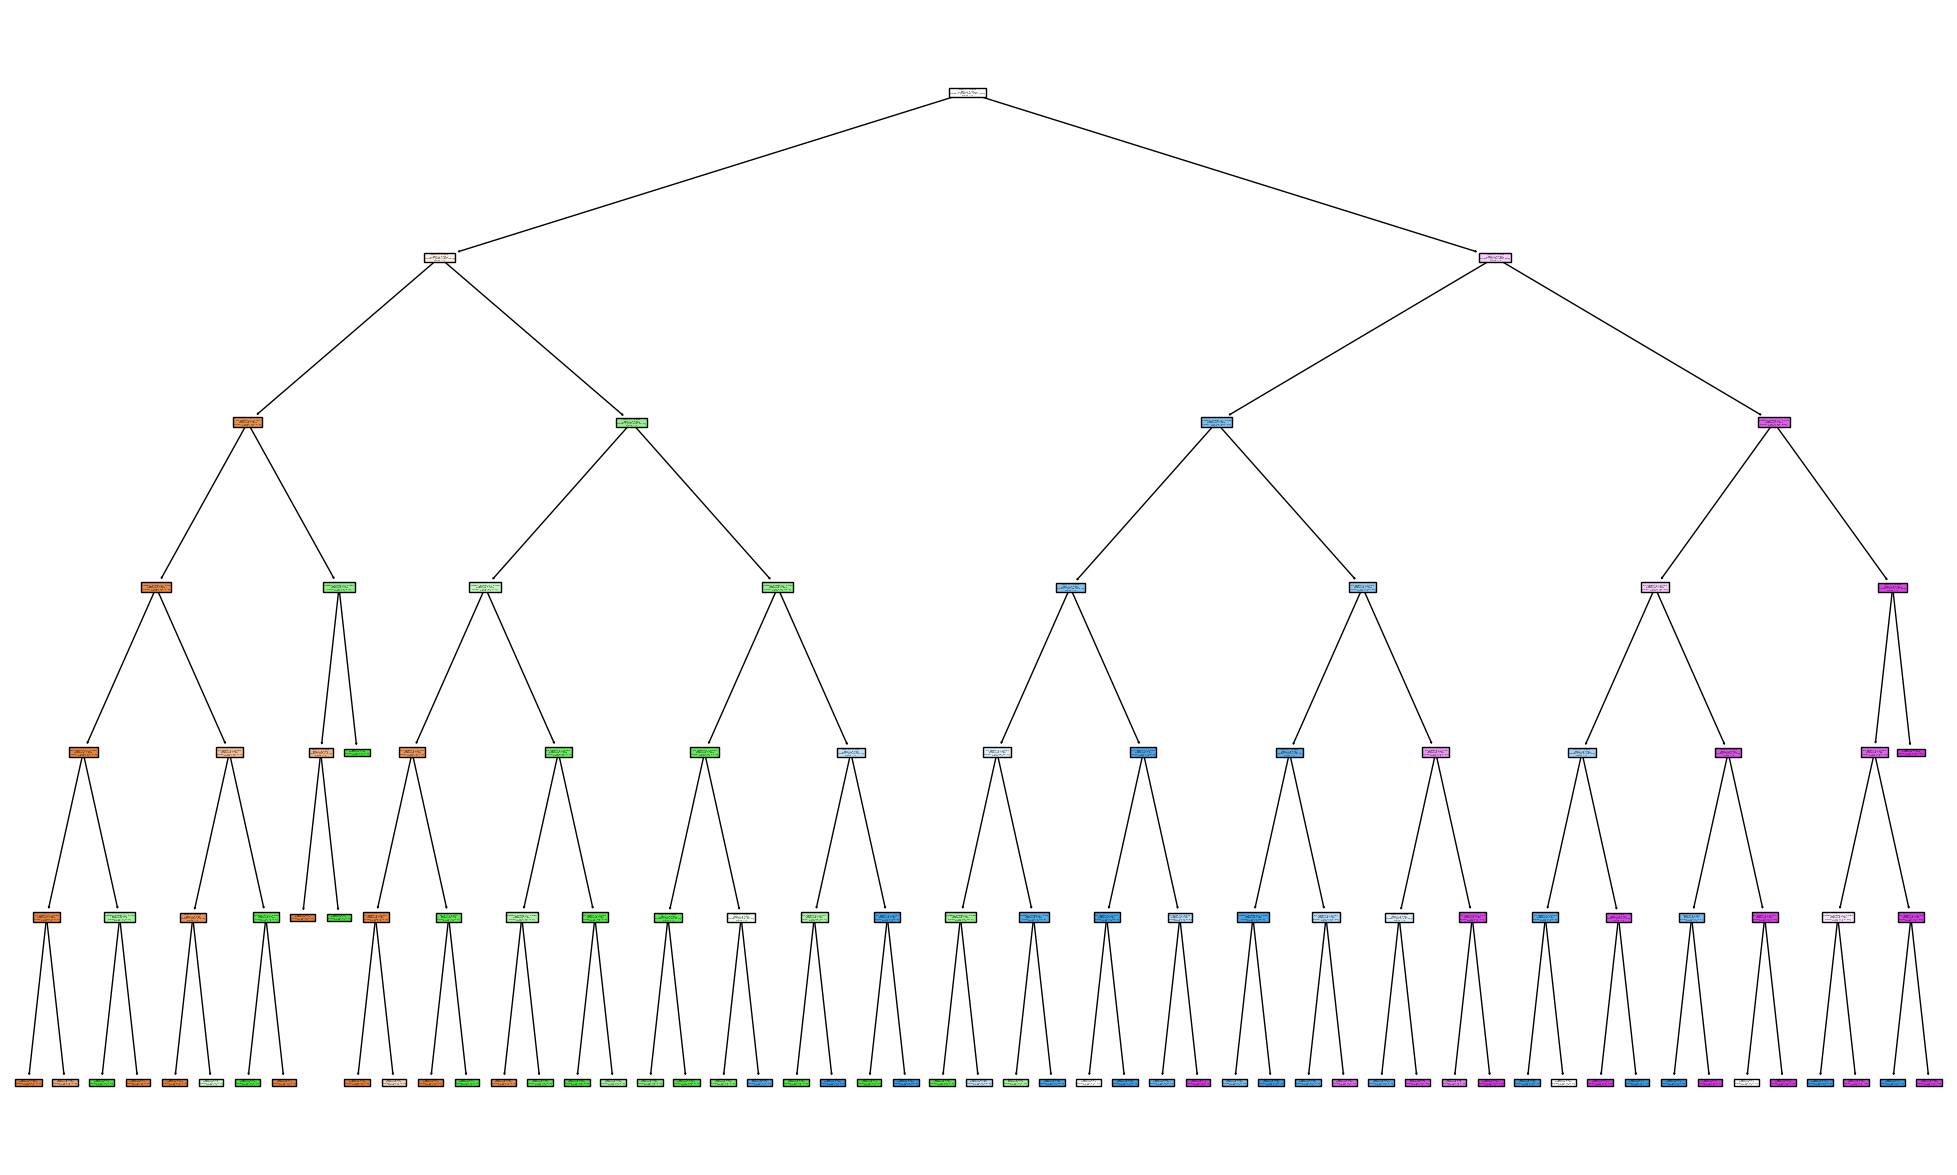

In [55]:
# Plot Tree With plot_tree
feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
target_names = ['0', '1','2','3']
fig = plt.figure (figsize = (25, 15))
plot = tree.plot_tree (clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True )

fig.savefig ('Tree1.png')

In [56]:
from sklearn.metrics import classification_report , confusion_matrix
confusion_matrix(y,clf.predict(x))

array([[467,  33,   0,   0],
       [ 20, 454,  26,   0],
       [  0,  39, 439,  22],
       [  0,   0,  25, 475]], dtype=int64)

In [57]:
print (classification_report (y , clf.predict (x)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       500
           1       0.86      0.91      0.88       500
           2       0.90      0.88      0.89       500
           3       0.96      0.95      0.95       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [59]:
df5=pd.read_csv("test.csv")
df_test=pd.DataFrame(df5)
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [60]:
df_test.drop(columns=['id'], inplace=True)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [61]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
norm1=scaler.fit_transform(df_test)
df1_test=pd.DataFrame(norm1,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
df1_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.362241,1.0,0.52,1.0,0.736842,0.0,0.048387,0.000000,0.941667,0.285714,0.80,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000,0.0,1.0,0.0
1,0.227485,1.0,0.00,1.0,0.210526,1.0,0.951613,0.777778,0.925000,0.571429,0.60,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778,1.0,0.0,0.0
2,0.871915,1.0,0.92,0.0,0.052632,0.0,0.403226,0.888889,0.883333,0.285714,0.20,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444,0.0,1.0,1.0
3,0.697799,0.0,0.00,1.0,0.947368,1.0,0.370968,0.444444,0.133333,1.000000,1.00,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778,1.0,1.0,0.0
4,0.623082,0.0,0.36,0.0,0.578947,1.0,0.758065,0.444444,0.233333,0.714286,0.90,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800534,1.0,0.56,0.0,0.000000,1.0,0.838710,0.444444,0.750000,0.857143,0.85,0.337703,0.275217,0.498658,0.642857,0.444444,0.722222,1.0,1.0,0.0
996,0.072715,0.0,0.52,1.0,0.000000,0.0,0.177419,0.888889,0.883333,0.428571,0.10,0.604090,0.755511,0.448202,0.214286,0.055556,0.944444,0.0,1.0,1.0
997,0.456971,0.0,0.36,0.0,0.052632,1.0,0.096774,0.444444,0.000000,0.000000,0.60,0.250131,0.216433,0.257649,0.000000,0.000000,0.666667,1.0,0.0,0.0
998,0.689126,1.0,0.00,1.0,0.000000,0.0,0.774194,0.333333,0.758333,0.142857,0.60,0.019927,0.221109,0.602791,0.714286,0.611111,0.222222,0.0,1.0,0.0


In [66]:
df_new = pd.concat([df1, df2], ignore_index=True)
#df_new=df2.append(df1_test)
df_new

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.000000,0.0,2.20,0.0,1.000000,0.0,7.000000,0.600000,188.000000,2.000000,...,20.000000,756.000000,2549.000000,9.000000,7.000000,19.000000,0.0,0.0,1.0,NaN
1,1021.000000,1.0,0.50,1.0,0.000000,1.0,53.000000,0.700000,136.000000,3.000000,...,905.000000,1988.000000,2631.000000,17.000000,3.000000,7.000000,1.0,1.0,0.0,NaN
2,563.000000,1.0,0.50,1.0,2.000000,1.0,41.000000,0.900000,145.000000,5.000000,...,1263.000000,1716.000000,2603.000000,11.000000,2.000000,9.000000,1.0,1.0,0.0,NaN
3,615.000000,1.0,2.50,0.0,0.000000,0.0,10.000000,0.800000,131.000000,6.000000,...,1216.000000,1786.000000,2769.000000,16.000000,8.000000,11.000000,1.0,0.0,0.0,NaN
4,1821.000000,1.0,1.20,0.0,13.000000,1.0,44.000000,0.600000,141.000000,2.000000,...,1208.000000,1212.000000,1411.000000,8.000000,2.000000,15.000000,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.0
3996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,2.0
3997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,3.0
3998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.0


In [67]:
df_new.iloc[1820:]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1820,665.000000,1.0,0.70,0.0,0.000000,1.0,31.000000,0.100000,185.000000,5.000000,...,496.000000,1804.000000,690.000000,5.000000,2.000000,15.000000,1.0,0.0,0.0,NaN
1821,680.000000,1.0,2.40,0.0,13.000000,1.0,34.000000,0.400000,157.000000,2.000000,...,686.000000,1418.000000,3845.000000,15.000000,1.000000,4.000000,1.0,1.0,1.0,NaN
1822,877.000000,0.0,1.50,1.0,0.000000,1.0,17.000000,0.100000,195.000000,7.000000,...,1064.000000,1985.000000,2004.000000,11.000000,8.000000,9.000000,1.0,1.0,1.0,NaN
1823,1493.000000,0.0,1.50,1.0,13.000000,0.0,53.000000,0.500000,102.000000,5.000000,...,240.000000,1414.000000,2083.000000,19.000000,15.000000,20.000000,0.0,1.0,1.0,NaN
1824,1762.000000,0.0,0.60,0.0,3.000000,1.0,26.000000,0.100000,83.000000,6.000000,...,525.000000,704.000000,2661.000000,9.000000,7.000000,4.000000,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0.0
3996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,2.0
3997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,3.0
3998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0.0


In [68]:
x_train = df_new [['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']][:1820]

y_train = df_new [['price_range']][:1820].values.reshape (-1 , 1)

x_test = df_new [['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']][1820:]

In [71]:
x =pd.DataFrame(df2,columns=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'])
y= df2['price_range'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [72]:
x_train , x_test , y_train , y_test = train_test_split (x , y , test_size = 0.3 , random_state = 1)
clf = RandomForestClassifier (n_estimators=140,max_depth=20)
clf = clf.fit (x_train , y_train)
y_pred  = clf.predict (x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

C:\Users\PRS\AppData\Local\Temp\ipykernel_6280\2612812078.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit (x_train , y_train)


Accuracy:  0.87


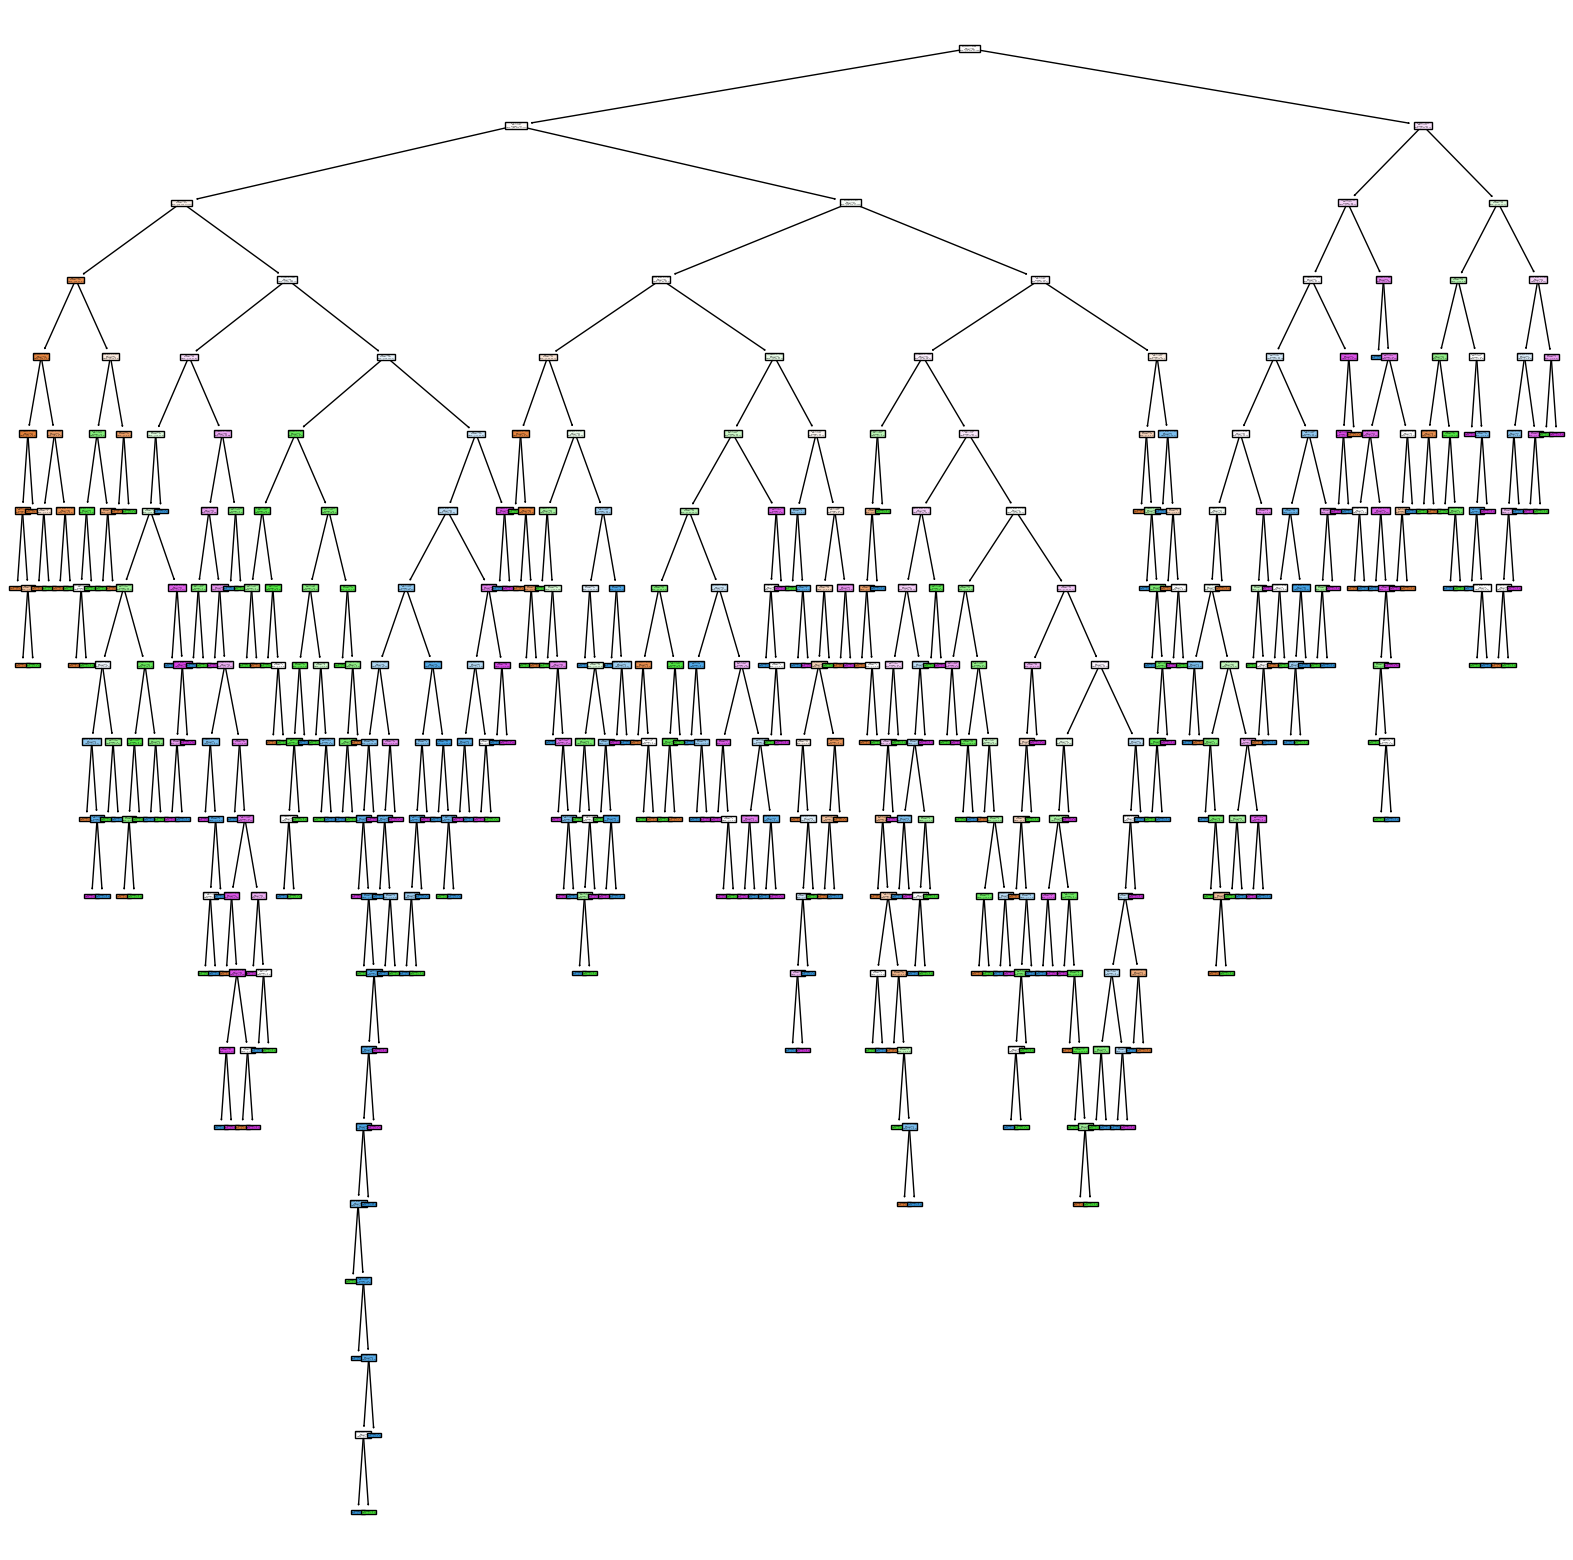

In [73]:
feature_names = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
target_names = ['0', '1','3','4']
plt.figure (figsize = (20 , 20) )
plot = tree.plot_tree (clf.estimators_[5], feature_names = feature_names, filled = True)
fig.savefig ('Tree2.png')

In [74]:
confusion_matrix(y,clf.predict(x))

array([[492,   8,   0,   0],
       [ 15, 472,  13,   0],
       [  0,  21, 470,   9],
       [  0,   0,  12, 488]], dtype=int64)

In [75]:
print (classification_report (y , clf.predict (x)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       500
           1       0.94      0.94      0.94       500
           2       0.95      0.94      0.94       500
           3       0.98      0.98      0.98       500

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

